# Project: Writing a Data Scientist Blog Post

## Business Understanding

Airbnb has become a popular alternative to traditional hotel accommodations, offering travelers a diverse range of rental options. But what should travelers who want to save money consider when booking an Airbnb accommodation? Which factors have a high influence on price?

This notebook examines data of Airbnb listings in Seattle, which includes information such as prices (in USD), neighbourhood locations and accommodation features (e.g. number of guests, bedrooms, property type etc.). It aims to give tips for travelling to Seattle on a budget by addressing three main questions:

Question 1. Which accomodation features influence the price the most?

Question 2. Which neighbourhoods have the highest prices?

Question 3. Which time of the year is the most expensive one?

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Understanding

### Gather

To start the analysis we load the datasets provided by Kaggle and save them into three variables.

In [101]:
calendar = pd.read_csv('//uh01502844.bmwgroup.net/home$/Q556621/01_Dateien/Data Scientist/Exercises/Project 1/Datensätze/Seattle/calendar.csv')
listings = pd.read_csv('//uh01502844.bmwgroup.net/home$/Q556621/01_Dateien/Data Scientist/Exercises/Project 1/Datensätze/Seattle/listings.csv')
reviews = pd.read_csv('//uh01502844.bmwgroup.net/home$/Q556621/01_Dateien/Data Scientist/Exercises/Project 1/Datensätze/Seattle/reviews.csv')

### Explore

In order to understand how the data is structured we will print the datasets, count values and look at the shape of the dataframes etc.

In [102]:
print(calendar.shape)
print(calendar.info())
print(calendar.value_counts("listing_id"))
print(calendar.value_counts("date"))
calendar.head()

(1393570, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None
listing_id
10340165    365
3335        365
4291        365
5682        365
6606        365
           ... 
11411       365
13068       365
14386       365
15108       365
17951       365
Name: count, Length: 3818, dtype: int64
date
2017-01-02    3818
2016-01-04    3818
2016-01-05    3818
2016-01-06    3818
2016-01-07    3818
              ... 
2016-01-20    3818
2016-01-21    3818
2016-01-22    3818
2016-01-23    3818
2016-01-24    3818
Name: count, Length: 365, dtype: int64


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [103]:
print(listings.shape)
print(listings.value_counts("id"))
print(listings.info())
listings.head()

(3818, 92)
id
10340165    1
3335        1
4291        1
5682        1
6606        1
           ..
11411       1
13068       1
14386       1
15108       1
17951       1
Name: count, Length: 3818, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [104]:
print(reviews.shape)
reviews.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Data preparation

### Clean

We will prepare three adjusted datasets, where each will be used to answer one of the three question stated above.

#### 1. Create a new dataframe "af"

We will create a new dataframe called "af" (short for accommodation features), which only includes the columns that are related to accommodation features and the price. The price column has to be converted into "float" in order to be able to calculate with it.
As the column "square_feet" only contains very few non-null entries (share of ~2% of all entries) I will not include it into the dataset.

In [105]:
#Create dataframe "af"
print(listings["square_feet"].info()) #--> As Square_feet has only 92 non-null entries, I will not include it to the dataset
af = listings[["id","price","property_type","room_type","accommodates","bathrooms","bedrooms","beds","bed_type"]]
#Use id as index
af = af.set_index("id")
#convert the price column into floats
af["price"] = af["price"].replace('[\$,]', '', regex=True).astype(float)
print(af)

<class 'pandas.core.series.Series'>
RangeIndex: 3818 entries, 0 to 3817
Series name: square_feet
Non-Null Count  Dtype  
--------------  -----  
97 non-null     float64
dtypes: float64(1)
memory usage: 30.0 KB
None
          price property_type        room_type  accommodates  bathrooms  \
id                                                                        
241032     85.0     Apartment  Entire home/apt             4        1.0   
953595    150.0     Apartment  Entire home/apt             4        1.0   
3308979   975.0         House  Entire home/apt            11        4.5   
7421966   100.0     Apartment  Entire home/apt             3        1.0   
278830    450.0         House  Entire home/apt             6        2.0   
...         ...           ...              ...           ...        ...   
8101950   359.0         House  Entire home/apt             6        2.0   
8902327    79.0     Apartment  Entire home/apt             4        1.0   
10267360   93.0         House  Enti

#### 2. Create a new dataframe "nb"

We will create a new dataframe called "nb" (short for neighbourhoods), which only includes the column which includes the summarized info regarding neighbourhoods and the price. The price column has to be converted into "float" in order to be able to calculate with it.

In [106]:
#Add the necessary columns
nb = listings[["id","neighbourhood_group_cleansed","price"]]
#use id as index
nb = nb.set_index("id")
#convert the price column into floats
nb["price"] = nb["price"].replace('[\$,]', '', regex=True).astype(float)
print(nb)

         neighbourhood_group_cleansed  price
id                                          
241032                     Queen Anne   85.0
953595                     Queen Anne  150.0
3308979                    Queen Anne  975.0
7421966                    Queen Anne  100.0
278830                     Queen Anne  450.0
...                               ...    ...
8101950           Other neighborhoods  359.0
8902327                  Capitol Hill   79.0
10267360               Rainier Valley   93.0
9604740                  Capitol Hill   99.0
10208623                   Queen Anne   87.0

[3818 rows x 2 columns]


#### 3. Create a new dataframe "cal"

We will create a new dataframe called "cal" (short for calendar), with seperate columns for year, month and day as well as the price. The price column has to be converted into "float" in order to be able to calculate with it. Furthermore we will not use the column "available".

We will drop missing price rows. This is because we want to look at the influence other variables have on price and imputation of e.g. mean or median price values would not add any value to this. This approach is also used in the whole notebook for the variable price.

In [107]:
#Use listing_id as index and rename it
cal = calendar.set_index("listing_id")
cal.index.name = "id"
#Split the date column in 3 different columns for year, month and day and convert them into integers.
cal[["year","month","day"]] = cal["date"].str.split("-",expand=True).astype(int)
#Drop unnecessary columns and drop rows with missing prices
cal = cal.drop(["available"],axis=1).dropna(subset=['price'], how='any')
#Convert the price column into floats
cal["price"] = cal["price"].replace('[\$,]', '', regex=True).astype(float)
print(cal)

                date  price  year  month  day
id                                           
241032    2016-01-04   85.0  2016      1    4
241032    2016-01-05   85.0  2016      1    5
241032    2016-01-13   85.0  2016      1   13
241032    2016-01-14   85.0  2016      1   14
241032    2016-01-18   85.0  2016      1   18
...              ...    ...   ...    ...  ...
10208623  2016-01-06   87.0  2016      1    6
10208623  2016-01-07   87.0  2016      1    7
10208623  2016-01-10   87.0  2016      1   10
10208623  2016-01-11   87.0  2016      1   11
10208623  2016-01-12   87.0  2016      1   12

[934542 rows x 5 columns]


#### Compare different sources of price information

There are two sources of price information:
1. calendar: price per day per apartment
2. listings: one price per apartment

How are these price information related to each other?

##### Assumption 1: Does listings maybe include the mean/min/max/median price per year from calendar?

Create two test datasets and merge them to compare the price columns:

In [108]:
test_df_calendar = cal.groupby("id").agg(mean_price_from_calendar=('price', 'mean'), min_price_from_calendar=('price', 'min'),\
max_price_from_calendar=('price', 'max'), median_price_from_calendar=('price', 'median'))
test_df_listings = nb[["price"]].rename(columns={"price":"price_from_listings"})
test_df_merged = pd.concat([test_df_calendar, test_df_listings], axis=1).dropna()
test_df_merged["delta_mean"] = test_df_merged["mean_price_from_calendar"] - test_df_merged["price_from_listings"]
test_df_merged["delta_min"] = test_df_merged["min_price_from_calendar"] - test_df_merged["price_from_listings"]
test_df_merged["delta_max"] = test_df_merged["max_price_from_calendar"] - test_df_merged["price_from_listings"]
test_df_merged["delta_median"] = test_df_merged["median_price_from_calendar"] - test_df_merged["price_from_listings"]
print(test_df_merged["delta_mean"].sum(), test_df_merged["delta_min"].sum(), test_df_merged["delta_max"].sum(), test_df_merged["delta_median"].sum())

32654.59595236611 -37398.0 117715.0 24942.5


Conclusion 1: None of the delta columns has a sum of 0, which means that assumption 1 from above is not true.

##### Assumption 2: Does listings maybe include the price from the day in column last_scraped?

Compare the prices from calendar and listings for the "last_scraped" date:

In [109]:
print(listings.value_counts("last_scraped")) #Conclusion: All rows in listings have the same "last_scraped" date (2016-01-04)
test_df_calendar_2 = cal.loc[cal['date'] == "2016-01-04"].drop(["date","month"],axis=1)
test_df_calendar_2 = test_df_calendar_2[["price"]].rename(columns={"price":"price_2016-01-04"})
test_df_merged_2 = pd.concat([test_df_calendar_2, test_df_listings], axis=1).dropna()
test_df_merged_2["delta_2016-01-04"] = test_df_merged_2["price_2016-01-04"] - test_df_merged_2["price_from_listings"]
print(test_df_merged_2["delta_2016-01-04"].sum())

last_scraped
2016-01-04    3818
Name: count, dtype: int64
-12480.0


Conclusion 2: The delta is not 0, which means that assumption 2 from above is not true.

##### Assumption 3: Does listings maybe include the mode of the prices from calendar?

In [110]:
test_df_calendar_3 = cal.groupby(['id'])['price'].agg(lambda x: pd.Series.mode(x)[0])
test_df_merged_3 = pd.concat([test_df_calendar_3, test_df_listings], axis=1).dropna()
test_df_merged_3["delta_mode"] = test_df_merged_3["price"] - test_df_merged_3["price_from_listings"]
print(test_df_merged_3["delta_mode"].sum())

20591.0


Conclusion 3: The delta is not 0, which means that assumption 3 from above is also not true.

##### Conclusion

As it is not clear from the information given, how the price in listings is derived, we will use the mean price from calendar for calculation for Q1 and Q3 for better comparability. 
This is why we will change the price column in the af and nb dataset:

In [111]:
#As it is not clear from the information given, how the price in listings is derived, I will use the mean price from calendar for calculation for Q1 and Q3 for better comparability. 
#Change of af and nb dataset:
af = af.drop(["price"], axis=1)
nb = nb.drop(["price"], axis=1)
cal_mean = cal.groupby("id").agg(price=('price', 'mean'))
nb = pd.concat([nb, cal_mean], axis=1).dropna()
af = pd.concat([af, cal_mean], axis=1).dropna()
print(nb)
print(af)

         neighbourhood_group_cleansed        price
id                                                
241032                     Queen Anne    85.000000
953595                     Queen Anne   170.931271
3308979                    Queen Anne  1301.818182
7421966                    Queen Anne   100.000000
278830                     Queen Anne   462.739726
...                               ...          ...
8101950           Other neighborhoods   359.000000
8902327                  Capitol Hill   100.201465
10267360               Rainier Valley    87.886364
9604740                  Capitol Hill    99.000000
10208623                   Queen Anne    87.000000

[3723 rows x 2 columns]
         property_type        room_type  accommodates  bathrooms  bedrooms  \
id                                                                           
241032       Apartment  Entire home/apt             4        1.0       1.0   
953595       Apartment  Entire home/apt             4        1.0       1.0   


## Evaluate results


### 1. Which accomodation features influence the price the most?

In order to find out which accommodation features influence the price the most we will set up a correlation heatmap. For the categorical values we will create dummy columns which have either the value 1 or 0.

#### Analyze

In [112]:
#Prepare the data for a correlation heatmap where the price column is the first
column_order = ["price", "accommodates", "bathrooms", "bedrooms", "beds", "property_type", "room_type", "bed_type"]
af = af.reindex(columns=column_order)
#Create dummy columns for categorical values
af = pd.get_dummies(data=af, columns=["property_type", "room_type","bed_type"], dtype=int)

#### Visualize

<Axes: title={'center': 'Correlation between price and accommodation features'}>

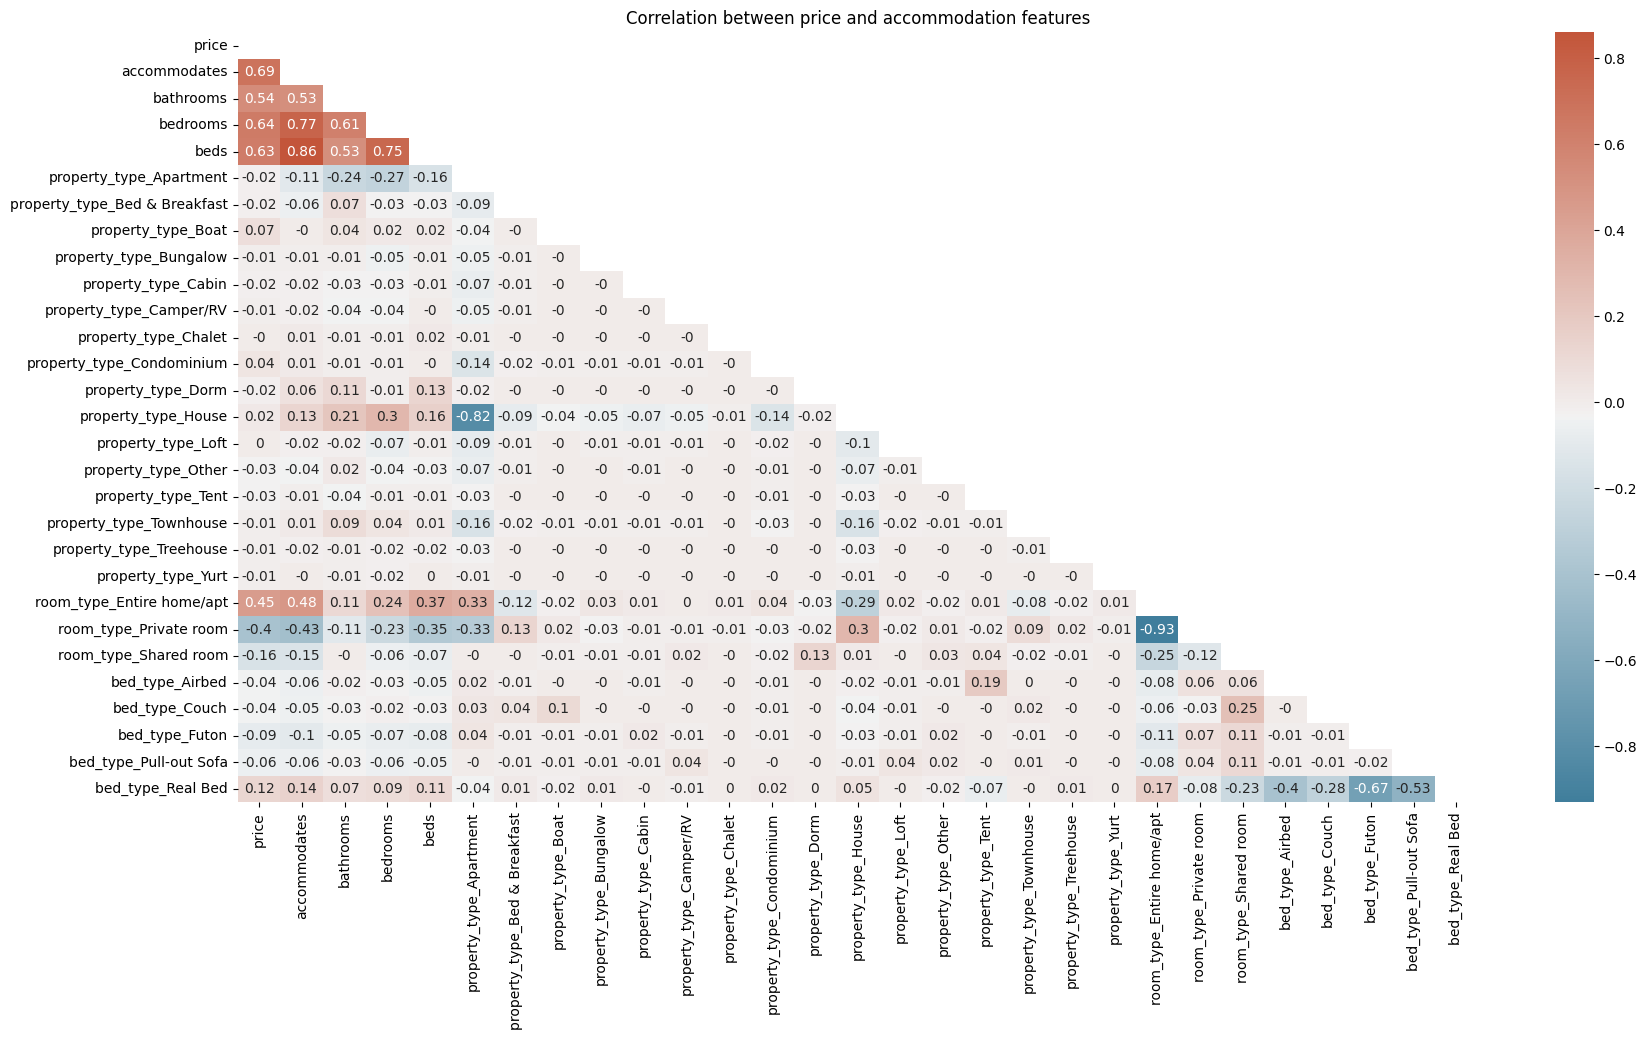

In [113]:
#Create a correlation heatmap
plt.figure(figsize=[20,10])
plt.title("Correlation between price and accommodation features")
sns.heatmap(af.corr(method='pearson', min_periods=1).round(2), mask= np.triu(np.ones_like(af.corr(), dtype=bool)), \
    annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))

#### Conclude

The only variables which show a significant correlation to the price (correlation coefficient > 0.6) are number of accomodates, bedrooms and beds. These three are also positively correlated with each other.

For the blogpost we will create a smaller diagram:

<Axes: title={'center': 'Correlation between price and accommodation features'}>

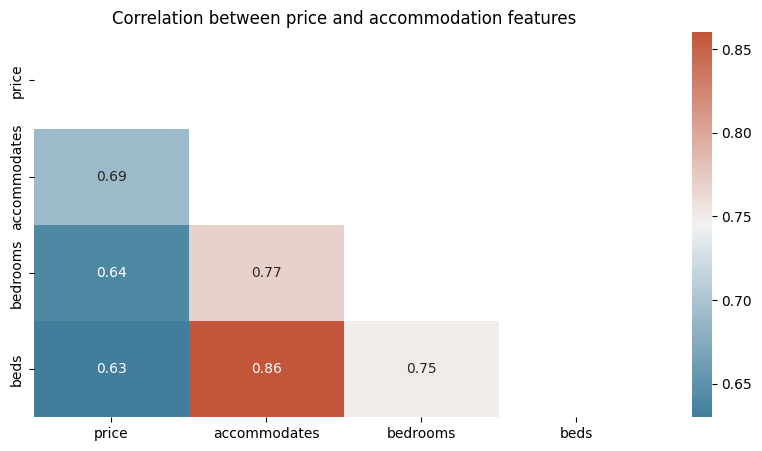

In [114]:
#Diagram for blog post (only displays the 3 features with high correlation)
af_small = af[["price", "accommodates", "bedrooms", "beds"]]
plt.figure(figsize=[10,5])
plt.title("Correlation between price and accommodation features")
sns.heatmap(af_small.corr(method='pearson', min_periods=1).round(2), mask= np.triu(np.ones_like(af_small.corr(), dtype=bool)), \
    annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))

### 2. Question: Which neighbourhoods have the highest prices?


We want to find out which neighbourhoods are the most expensive ones. As we discovered in Question 1, the number of possible guests is influencing the price of the accommodation crucially. Thats why we will do the analysis for price per accomodation as well as for price per person. For both subquestions we will create a bar chart with the mean price per neighbourhood.

#### 2a. Price per accommodation

##### Analyze

In [115]:
#Create a bar chart with the mean price per neighbourhood in an descending order
nb_mean_price = nb.groupby("neighbourhood_group_cleansed").agg(mean_price=('price', 'mean'))
nb_mean_price = nb_mean_price.sort_values(["mean_price"], ascending=False)
nb_mean_price = nb_mean_price.reset_index()
nb_mean_price = nb_mean_price.query("neighbourhood_group_cleansed != 'Other neighborhoods'")
print(nb_mean_price)

   neighbourhood_group_cleansed  mean_price
0                      Magnolia  192.425434
1                      Downtown  178.006484
2                    Queen Anne  167.467803
3                       Cascade  146.140167
4                  West Seattle  145.977605
5                  Capitol Hill  135.077805
6                  Central Area  132.654824
7                       Ballard  126.857885
9                      Interbay  117.308887
10                  Seward Park  107.844180
11          University District   98.482903
12                  Beacon Hill   97.705748
13               Rainier Valley   95.535589
14                    Lake City   95.200871
15                    Northgate   93.525891
16                     Delridge   87.804785


##### Visualize

Text(0.5, 1.0, 'Mean price per neighbourhood per accommodation')

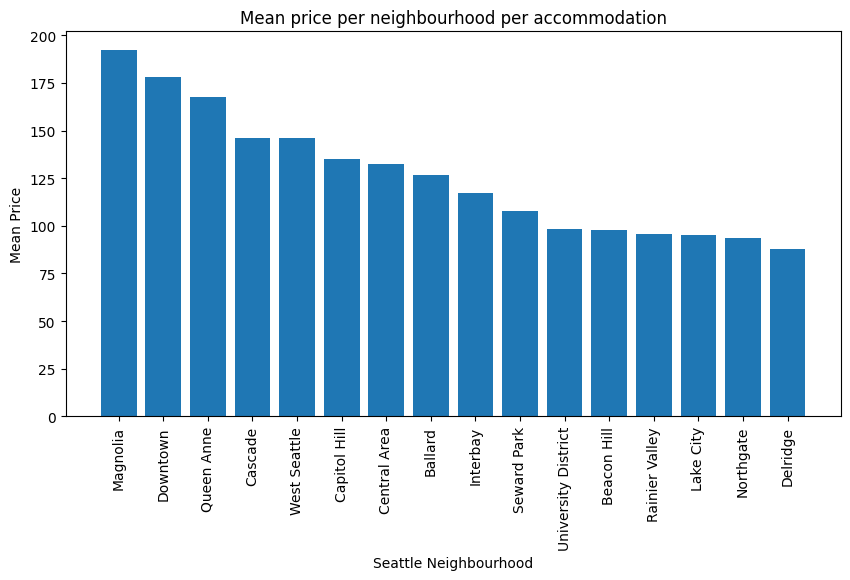

In [116]:
plt.figure(figsize=[10,5]) 
plt.bar(nb_mean_price.neighbourhood_group_cleansed, nb_mean_price.mean_price)
plt.xlabel("Seattle Neighbourhood")
plt.ylabel("Mean Price")
plt.xticks(rotation=90)
plt.title("Mean price per neighbourhood per accommodation")

##### Conclude

The neighbourhoods "Magnolia", "Downtown" and "Queen Anne" have the highest mean prices per accomodation in Seattle.

#### 2b. Price per person

##### Analyze

In [117]:
#Calculate price per accomodate per neighbourhood
nb = pd.concat([nb, af.accommodates], axis=1)
nb_mean_accommodates = nb.groupby("neighbourhood_group_cleansed").agg(accommodates=('accommodates', 'mean'))
print(nb_mean_accommodates)
nb["price_per_person"] = nb.price / nb.accommodates

                              accommodates
neighbourhood_group_cleansed              
Ballard                           3.434211
Beacon Hill                       2.991304
Capitol Hill                      2.963168
Cascade                           2.930233
Central Area                      3.486034
Delridge                          2.855263
Downtown                          3.572549
Interbay                          2.363636
Lake City                         2.712121
Magnolia                          4.475410
Northgate                         3.438356
Other neighborhoods               3.377113
Queen Anne                        3.436426
Rainier Valley                    3.154839
Seward Park                       3.697674
University District               2.908333
West Seattle                      3.784615


##### Visualize

   neighbourhood_group_cleansed  mean_price_per_person
0                      Interbay              53.995523
1                      Downtown              53.468812
2                    Queen Anne              50.790719
3                       Cascade              50.472695
4                  Capitol Hill              48.617658
5                      Magnolia              46.370453
6                  West Seattle              41.941885
7                  Central Area              41.077251
9                     Lake City              38.741779
10                      Ballard              38.454317
11                  Beacon Hill              36.872113
12          University District              36.136689
13               Rainier Valley              32.720573
14                     Delridge              32.672586
15                    Northgate              31.007358
16                  Seward Park              30.432290


Text(0.5, 1.0, 'Mean price per neighbourhood per person')

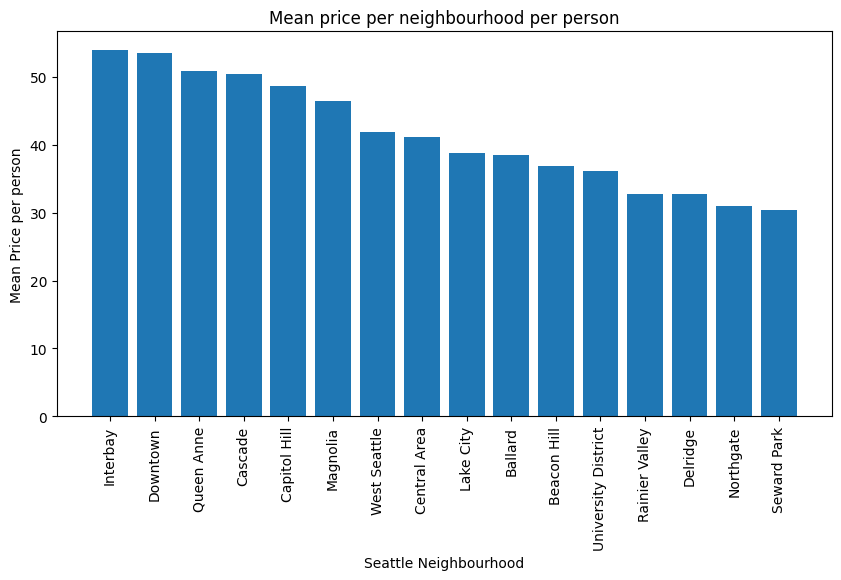

In [118]:
#Create a bar chart with the mean price per person for every neighbourhood in an descending order
nb_mean_price = nb.groupby("neighbourhood_group_cleansed").agg(mean_price_per_person=('price_per_person', 'mean'))
nb_mean_price = nb_mean_price.sort_values(["mean_price_per_person"], ascending=False)
nb_mean_price = nb_mean_price.reset_index()
nb_mean_price = nb_mean_price.query("neighbourhood_group_cleansed != 'Other neighborhoods'")
print(nb_mean_price)

plt.figure(figsize=[10,5]) 
plt.bar(nb_mean_price.neighbourhood_group_cleansed, nb_mean_price.mean_price_per_person)
plt.xlabel("Seattle Neighbourhood")
plt.ylabel("Mean Price per person")
plt.xticks(rotation=90)
plt.title("Mean price per neighbourhood per person")


##### Conclude

Now, "Magnolia" is not in the Top 3 any more, but has still a quite high price level. "Interbay" is now the most expensive neighbourhood, while "Downtown" and "Queen Anne" stay at the same position.

### 3. Which time of the year is the most expensive one?

#### Analyze & Visualize

We will analyze the development of the price over the year by plotting the mean price per day and per month.

Text(0.5, 1.0, 'Mean price per month')

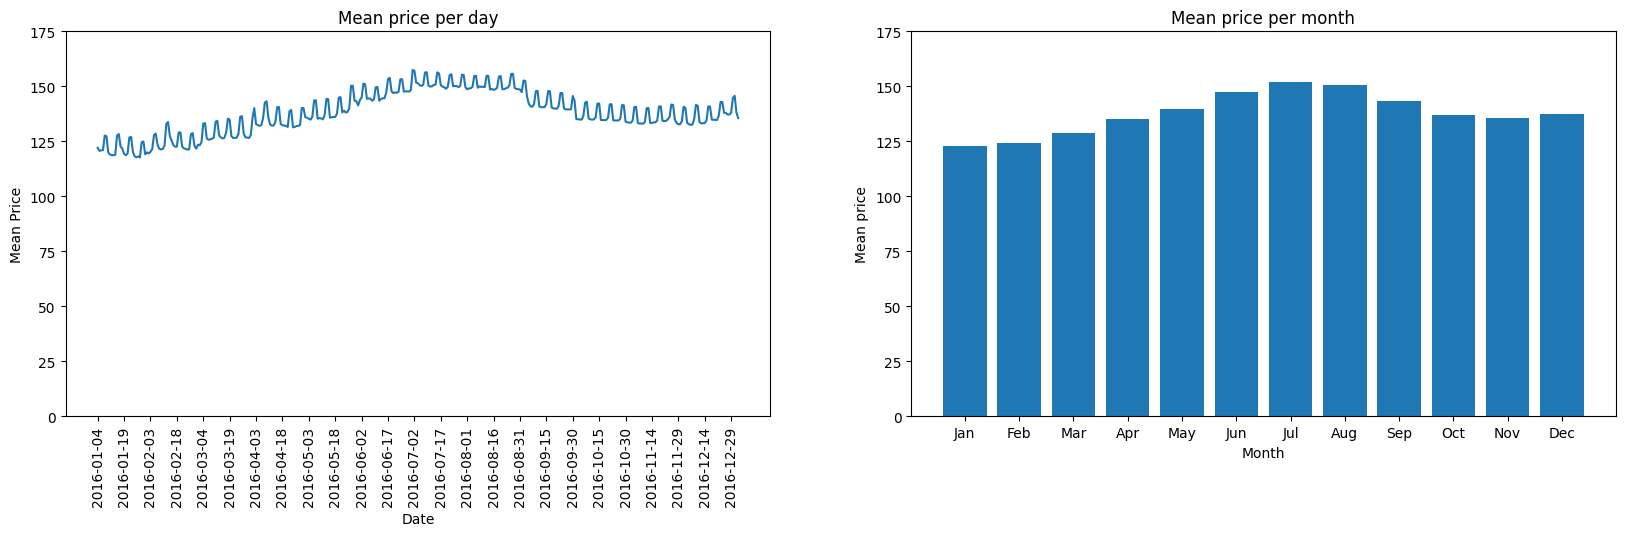

In [119]:
cal_mean_day = cal.groupby("date").agg(mean_price_per_day=('price', 'mean'))
cal_mean_month = cal.groupby("month").agg(mean_price_per_month=('price', 'mean'))
cal_mean_month = cal_mean_month.reset_index()

#Line graph (mean prices per day)
plt.figure(figsize=[20,5])
plt.subplot(1, 2, 1) 
plt.plot(cal_mean_day)
plt.xlabel("Date")
plt.ylabel("Mean Price")
plt.xticks(np.arange(0, 366, 15))
plt.yticks(range(0,200,25))
plt.xticks(rotation=90)
plt.title("Mean price per day")

#Bar Plot (mean prices per month)
plt.subplot(1, 2, 2) 
plt.bar(cal_mean_month.month, cal_mean_month.mean_price_per_month)
plt.xlabel("Month")
plt.ylabel("Mean price")
plt.xticks(ticks=np.arange(1, 13, 1),labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug", "Sep", "Oct", "Nov", "Dec"])
plt.yticks(range(0,200,25))
plt.title("Mean price per month")

The left plot shows a high fluctuation in the values, however also a certain trend for higher prices in summer. The right plot confirms this assumption by showing the highest mean prices per month in June, July and August. 
The high fluctuation in the left graph might come from higher prices on weekends than on weekdays, which is further looked at in the next graph.

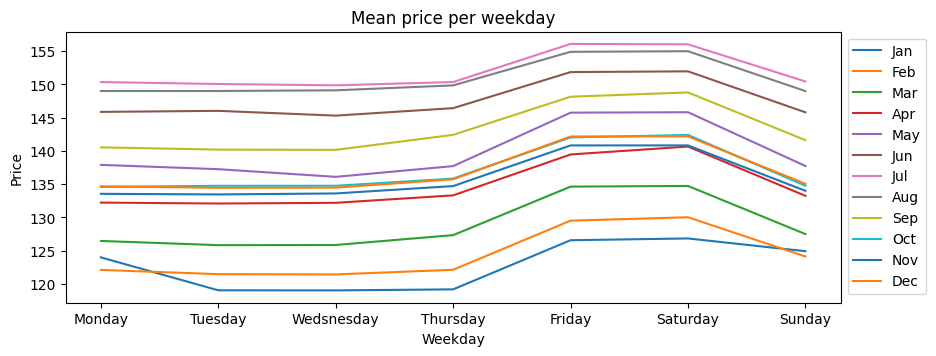

In [120]:
#Analyze the mean price per weekday in each month
cal['weekday'] = pd.to_datetime(cal['date'], errors='coerce')
cal['weekday'] = cal['weekday'].dt.weekday

def line_graph (month):
    """"
    This function provides a line graph including the prcies per weekday with one line for each month.
    input: month (number 1-12)
    output: subplot for one month"""
    month_df = cal.query("month == @month")
    cal_mean_month = month_df.groupby("weekday").agg(mean_price_per_day=('price', 'mean'))
    plt.subplot(12, 1, 1) 
    plt.plot(cal_mean_month)
    plt.xticks(np.arange(0, 7, 1))
    legend = ["Jan","Feb","Mar","Apr","May","Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    plt.xlabel("Weekday")
    plt.xticks(ticks=np.arange(0, 7, 1),labels=["Monday","Tuesday","Wedsnesday","Thursday","Friday","Saturday","Sunday"])
    plt.ylabel("Price")
    plt.legend(legend, bbox_to_anchor=(1, 1))
    plt.title("Mean price per weekday")

plt.figure(figsize=[10,50])
line_graph(1)
line_graph(2)
line_graph(3)
line_graph(4)
line_graph(5)
line_graph(6)
line_graph(7)
line_graph(8)
line_graph(9)
line_graph(10)
line_graph(11)
line_graph(12)


#### Conclude

The weekday function gives a number per weekday, where 0 means Monday and 6 means Sunday. The chart shows, that in every month the mean price is the highest on Fridays and Saturdays, which confirms the assumption from above.

## Summary

All in all, we found the following conclusions:

1. The accomodation features number of accomodates, bedrooms and beds have a significant positive correlation to price. They are also positively correlated to each other.

2. The neighbourhoods "Magnolia", "Downtown" and "Queen Anne" have the highest mean prices per accomodation in Seattle. As the number of accomodates has a high correlation with price I also analyzed if the TOP 3 neighbourhoods will change when looking at the price per person (not accomodation). When doing this, "Magnolia" drops out of the TOP 3 and is replaced by "Interbay".

3.  The highest prices can be observed in summer (June, July and August) and on weekends (Fridays and Saturdays).